Load in libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.fft import fft, ifft
import scipy.stats as stat
from scipy import fftpack
from scipy import signal

Load data

In [ ]:
# info
features_list = pd.read_csv("https://raw.githubusercontent.com/aannasw/uci-har/master/data/UCI-HAR-Dataset/features.txt",header=None, sep="\s+")
activity_labels = pd.read_csv("https://raw.githubusercontent.com/aannasw/uci-har/master/data/UCI-HAR-Dataset/activity_labels.txt",header=None, sep="\s+")

# train/test data
train_x = pd.read_csv("https://raw.githubusercontent.com/aannasw/uci-har/master/data/UCI-HAR-Dataset/train/X_train.txt",header=None, sep="\s+")
train_y = pd.read_csv("https://raw.githubusercontent.com/aannasw/uci-har/master/data/UCI-HAR-Dataset/train/y_train.txt",header=None, sep="\s+")
test_x = pd.read_csv("https://raw.githubusercontent.com/aannasw/uci-har/master/data/UCI-HAR-Dataset/test/X_test.txt",header=None, sep="\s+")
test_y = pd.read_csv("https://raw.githubusercontent.com/aannasw/uci-har/master/data/UCI-HAR-Dataset/test/y_test.txt",header=None, sep="\s+")

# raw data
train_raw_tx = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/total_acc_x_train.txt",header=None, sep="\s+")
train_raw_ty = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/total_acc_y_train.txt",header=None, sep="\s+")
train_raw_tz = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/total_acc_z_train.txt",header=None, sep="\s+")
train_body_tx = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_acc_x_train.txt",header=None, sep="\s+")

test_raw_tx = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/total_acc_x_test.txt",header=None, sep="\s+")
test_raw_ty = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/total_acc_y_test.txt",header=None, sep="\s+")
test_raw_tz = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/total_acc_z_test.txt",header=None, sep="\s+")

train_y = train_y.rename(columns={0 : 'label'})
test_y = test_y.rename(columns={0 : 'label'})

**4.1)** Statistics

In [ ]:
print(train_x.iloc[:,121:124].describe())

               121          122          123
count  7352.000000  7352.000000  7352.000000
mean     -0.076164     0.086588    -0.720888
std       0.132378     0.139305     0.306724
min      -0.851973    -0.902860    -1.000000
25%      -0.103604     0.064135    -0.988073
50%      -0.074778     0.086114    -0.911508
75%      -0.052112     0.109599    -0.477885
max       1.000000     1.000000     1.000000


**4.2)** Plot the number of instances of each target

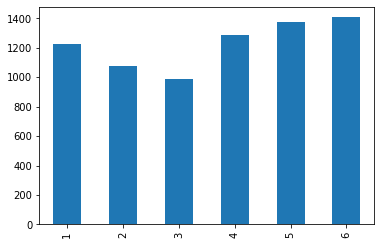

In [ ]:
train_y[0].value_counts().sort_index().plot.bar()

**4.3)** Plot feature distribution of each target

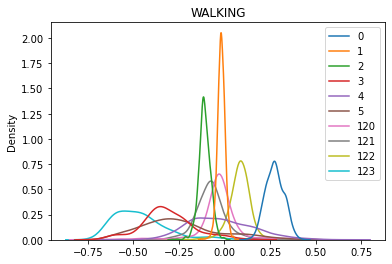

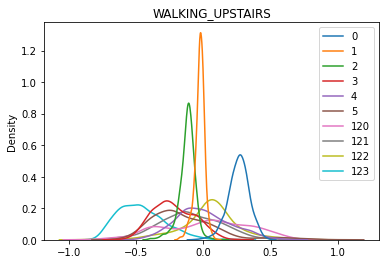

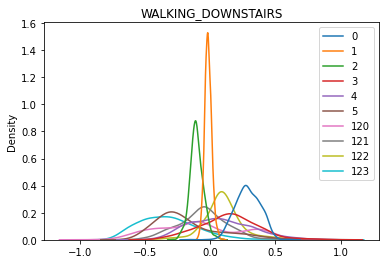

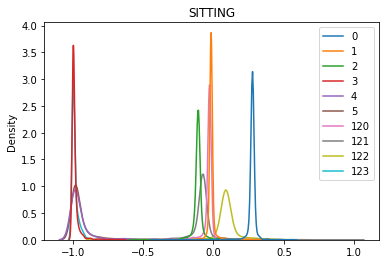

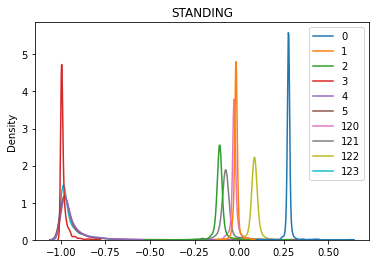

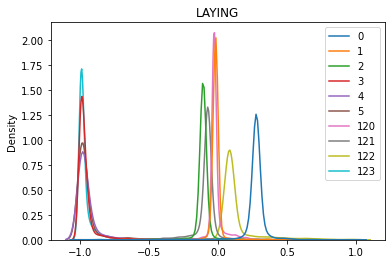

In [ ]:
activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
for i in range(1,7):
    sns.kdeplot(data = train_x[(train_y['label'] == i)].iloc[:,[0,1,2,3,4,5,120,121,122,123]]).set_title(activity_labels[i-1])
    plt.show()

**4.4)** Exploring raw data

In [ ]:
print(train_raw_tx.iloc[:,0:63].var().mean(axis = 0))
print(train_raw_ty.iloc[:,0:63].var().mean(axis = 0))
print(train_raw_tz.iloc[:,0:63].var().mean(axis = 0))
print(test_raw_tx.iloc[:,0:63].var().mean(axis = 0))
print(test_raw_ty.iloc[:,0:63].var().mean(axis = 0))
print(test_raw_tz.iloc[:,0:63].var().mean(axis = 0))

0.17125934095512113
0.1528689856706066
0.12779766377458096
0.16511271359778237
0.16983207967567504
0.09460340646016063


In [ ]:
print(train_body_tx.iloc[[0,1,2],[62,63,64,125,126,127]]) 

        62        63        64        125       126       127
0 -0.001528 -0.002391  0.001094 -0.001147 -0.000222  0.001576
1 -0.000222  0.001576  0.003531 -0.004646 -0.002941 -0.001599
2 -0.002941 -0.001599 -0.001772  0.001246  0.003117  0.002178


In [ ]:
train_raw_tx_trunc = train_body_tx.iloc[:,0:64]
dict = {}
i = 0 
for index, row in train_raw_tx_trunc.iterrows():
    for v in row:
      dict[i] = {"data": v, "label": train_y._get_value(index, 0)}
      i = i + 1
train_raw_clean = pd.DataFrame.from_dict(dict, orient='index')
print(train_raw_clean)

KeyError: ignored

In [ ]:
train_raw_clean.iloc[:,[0]].plot()

**4.5)**

In [ ]:
print(train_raw_clean.skew())
for i in range(1,7):
  print(activity_labels[i-1])
  print(train_raw_clean[(train_raw_clean['label'] == i)].describe())
  print(train_raw_clean[(train_raw_clean['label'] == i)].kurtosis())
  print(train_raw_clean[(train_raw_clean['label'] == i)].var())

In [ ]:
dict = {}
for i in range(0,100):
  dict[i/100.00-0.5] = {"1": stat.norm(-0.000499,0.228915).pdf((i-50)/100.00), "2": stat.norm(-0.004922,0.259828).pdf((i-50)/100.00), 
             "3": stat.norm(-0.002215,0.376410).pdf((i-50)/100.00), "4": stat.norm(-0.001038,0.018022).pdf((i-50)/100.00),
             "5": stat.norm(-0.000727,0.012553).pdf((i-50)/100.00), "6": stat.norm(-0.003126,0.045274).pdf((i-50)/100.00)}
  #dict[i] = stat.norm(-0.000499,0.228915).pdf((i-50)/100.00)
print(dict)
norm = pd.DataFrame.from_dict(dict, orient='index')
norm.plot()

**4.6)**

In [ ]:
walking_raw = train_raw_clean[(train_raw_clean['label'] == 1)].iloc[:,[0]]
arr_walking = []
for i in range(0,len(walking_raw)):
  arr_walking.append(walking_raw.iloc[i][0])


In [ ]:
N = len(arr)
T = 1/50
yf = fft(arr)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
means = [-0.000499, -0.004922, 0.002215, -0.001038, 0.000727, -0.003126]
for i in range(1,7):
  raw = train_raw_clean[(train_raw_clean['label'] == i)].iloc[:,[0]]
  arr = []
  for j in range(0,len(raw)):
    arr.append(raw.iloc[j][0] - means[i-1])
  N = len(arr)
  T = 1/50
  yf = fft(arr)
  xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
  plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
  plt.grid()
  plt.show()


**4.7)**

In [ ]:
walking_raw = train_raw_clean[(train_raw_clean['label'] == 1)].iloc[:,[0]]
arr = []
for i in range(0,len(walking_raw)):
  arr.append(walking_raw.iloc[i][0])
N = len(arr)
T = 1/50
yf = fft(arr)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
sos = signal.butter(4, 6, 'low', fs = 50, output='sos')

filtered = signal.sosfilt(sos, arr)
yf = fft(filtered)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

In [ ]:
N = len(arr)
T = 1/50
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
sos = signal.butter(4, [0.75, 6],'bandpass', fs = 50, output='sos')

for i in range(1,7):
  raw = train_raw_clean[(train_raw_clean['label'] == i)].iloc[:,[0]]
  arr = []
  for j in range(0,len(raw)):
    arr.append(raw.iloc[j][0] - means[i-1])
  filtered = signal.sosfilt(sos, arr)
  yf = fft(filtered)
  plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
  plt.show()

**4.8)** Code for DTW taken from the github link in the assignment

In [ ]:
import sys
import collections
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform

In [ ]:
try:
    from IPython.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False
class KnnDtw(object):  
    def __init__(self, n_neighbors=5, max_warping_window=10000, subsample_step=1):
        self.n_neighbors = n_neighbors
        self.max_warping_window = max_warping_window
        self.subsample_step = subsample_step
    
    def fit(self, x, l):
        self.x = x
        self.l = l
        
    def _dtw_distance(self, ts_a, ts_b, d = lambda x,y: abs(x-y)):
        # Create cost matrix via broadcasting with large int
        ts_a, ts_b = np.array(ts_a), np.array(ts_b)
        M, N = len(ts_a), len(ts_b)
        cost = sys.maxsize * np.ones((M, N))

        # Initialize the first row and column
        cost[0, 0] = d(ts_a[0], ts_b[0])
        for i in range(1, M):
            cost[i, 0] = cost[i-1, 0] + d(ts_a[i], ts_b[0])

        for j in range(1, N):
            cost[0, j] = cost[0, j-1] + d(ts_a[0], ts_b[j])

        # Populate rest of cost matrix within window
        for i in range(1, M):
            for j in range(max(1, i - self.max_warping_window),
                            min(N, i + self.max_warping_window)):
                choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
                cost[i, j] = min(choices) + d(ts_a[i], ts_b[j])

        # Return DTW distance given window 
        return cost[-1, -1]
    
    def _dist_matrix(self, x, y):
        # Compute the distance matrix        
        dm_count = 0
        
        # Compute condensed distance matrix (upper triangle) of pairwise dtw distances
        # when x and y are the same array
        if(np.array_equal(x, y)):
            x_s = np.shape(x)
            dm = np.zeros((x_s[0] * (x_s[0] - 1)) // 2, dtype=np.double)
            
            p = ProgressBar(np.shape(dm)[0])
            
            for i in range(0, x_s[0] - 1):
                for j in range(i + 1, x_s[0]):
                    dm[dm_count] = self._dtw_distance(x[i, ::self.subsample_step],
                                                      y[j, ::self.subsample_step])
                    
                    dm_count += 1
                    p.animate(dm_count)
            
            # Convert to squareform
            dm = squareform(dm)
            return dm
        
        # Compute full distance matrix of dtw distnces between x and y
        else:
            x_s = np.shape(x)
            y_s = np.shape(y)
            dm = np.zeros((x_s[0], y_s[0])) 
            dm_size = x_s[0]*y_s[0]
            
            p = ProgressBar(dm_size)
        
            for i in range(0, x_s[0]):
                for j in range(0, y_s[0]):
                    dm[i, j] = self._dtw_distance(x[i, ::self.subsample_step],
                                                  y[j, ::self.subsample_step])
                    # Update progress bar
                    dm_count += 1
                    p.animate(dm_count)
        
            return dm
        
    def predict(self, x):  
        dm = self._dist_matrix(x, self.x)

        # Identify the k nearest neighbors
        knn_idx = dm.argsort()[:, :self.n_neighbors]

        # Identify k nearest labels
        knn_labels = self.l[knn_idx]
        
        # Model Label
        mode_data = mode(knn_labels, axis=1)
        mode_label = mode_data[0]
        mode_proba = mode_data[1]/self.n_neighbors

        return mode_label.ravel(), mode_proba.ravel()

class ProgressBar:
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        print('\r', self)
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) // 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)

Get all data cleaned

In [ ]:
raw_total_acc_x_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/total_acc_x_train.txt",header=None, sep="\s+")
raw_total_acc_y_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/total_acc_y_train.txt",header=None, sep="\s+")
raw_total_acc_z_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/total_acc_z_train.txt",header=None, sep="\s+")

raw_body_acc_x_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_acc_x_train.txt",header=None, sep="\s+")
raw_body_acc_y_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_acc_y_train.txt",header=None, sep="\s+")
raw_body_acc_z_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_acc_z_train.txt",header=None, sep="\s+")

raw_body_gyro_x_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_gyro_x_train.txt",header=None, sep="\s+")
raw_body_gyro_y_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_gyro_y_train.txt",header=None, sep="\s+")
raw_body_gyro_z_ = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/train/Inertial%20Signals/body_gyro_z_train.txt",header=None, sep="\s+")

raw_total_acc_x_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/total_acc_x_test.txt",header=None, sep="\s+")
raw_total_acc_y_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/total_acc_y_test.txt",header=None, sep="\s+")
raw_total_acc_z_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/total_acc_z_test.txt",header=None, sep="\s+")

raw_body_acc_x_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/body_acc_x_test.txt",header=None, sep="\s+")
raw_body_acc_y_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/body_acc_y_test.txt",header=None, sep="\s+")
raw_body_acc_z_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/body_acc_z_test.txt",header=None, sep="\s+")

raw_body_gyro_x_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/body_gyro_x_test.txt",header=None, sep="\s+")
raw_body_gyro_y_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/body_gyro_y_test.txt",header=None, sep="\s+")
raw_body_gyro_z_test = pd.read_csv("https://raw.githubusercontent.com/ahmedtadde/UCI-HAR-Dataset/master/test/Inertial%20Signals/body_gyro_z_test.txt",header=None, sep="\s+")

In [ ]:
def get_cleaned_data(raw_data_, label_data):
  raw_data = raw_data_.iloc[:,0:64]
  dict = {}
  i = 0 
  for index, row in raw_data.iterrows():
    for v in row:
      dict[i] = {"data": v, "label": label_data._get_value(index, 'label')}
      i = i + 1
  df = pd.DataFrame.from_dict(dict, orient='index')
  return df

In [ ]:
cleaned_data = get_cleaned_data(raw_total_acc_x_, train_y).rename(columns={'data' : 't_acc_x'}).iloc[:,[0]]
cleaned_data = cleaned_data.join(get_cleaned_data(raw_total_acc_y_, train_y).rename(columns={'data' : 't_acc_y'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_total_acc_z_, train_y).rename(columns={'data' : 't_acc_z'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_acc_x_, train_y).rename(columns={'data' : 'b_acc_x'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_acc_y_, train_y).rename(columns={'data' : 'b_acc_y'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_acc_z_, train_y).rename(columns={'data' : 'b_acc_z'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_gyro_x_, train_y).rename(columns={'data' : 'b_gyro_x'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_gyro_y_, train_y).rename(columns={'data' : 'b_gyro_y'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_gyro_z_, train_y).rename(columns={'data' : 'b_gyro_z'}).iloc[:,[0]])
cleaned_data = cleaned_data.join(get_cleaned_data(raw_body_gyro_z_, train_y).rename(columns={'data' : 'b_gyro_z'}).iloc[:,[1]])

In [ ]:
cleaned_data_test = get_cleaned_data(raw_total_acc_x_test, test_y).rename(columns={'data' : 't_acc_x'}).iloc[:,[0]]
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_total_acc_y_test, test_y).rename(columns={'data' : 't_acc_y'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_total_acc_z_test, test_y).rename(columns={'data' : 't_acc_z'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_acc_x_test, test_y).rename(columns={'data' : 'b_acc_x'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_acc_y_test, test_y).rename(columns={'data' : 'b_acc_y'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_acc_z_test, test_y).rename(columns={'data' : 'b_acc_z'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_gyro_x_test, test_y).rename(columns={'data' : 'b_gyro_x'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_gyro_y_test, test_y).rename(columns={'data' : 'b_gyro_y'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_gyro_z_test, test_y).rename(columns={'data' : 'b_gyro_z'}).iloc[:,[0]])
cleaned_data_test = cleaned_data_test.join(get_cleaned_data(raw_body_gyro_z_test, test_y).rename(columns={'data' : 'b_gyro_z'}).iloc[:,[1]])

In [ ]:
x_data = cleaned_data.iloc[:,0:9].to_numpy()
x_data_test = cleaned_data_test.iloc[:,0:9].to_numpy()

y_data = cleaned_data.iloc[:,9].to_numpy()
y_data_test = cleaned_data_test.iloc[:,9].to_numpy()

In [ ]:
print(x_data[0:3])
print("number of values x_data: ", len(x_data))
print(y_data[0:10])
print("number of values y_data: ", len(y_data))

print(y_data_test[0:10])
print("number of values y_test: ", len(y_data_test))
print(x_data_test[0:3])
print("number of values x_test: ", len(x_data_test))

In [ ]:
steps = 100;
x_test = x_data_test[::steps]

In [ ]:
m = KnnDtw(n_neighbors=1, max_warping_window=10)
m.fit(x_data[::steps], y_data[::steps])
label, proba = m.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

print(classification_report(label, y_data_test[::steps],
                            target_names=[l for l in labels.values()]))

conf_mat = confusion_matrix(label, y_data_test[::steps])

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
_ = plt.xticks(range(6), [l for l in labels.values()], rotation=90)
_ = plt.yticks(range(6), [l for l in labels.values()])